<a href="https://colab.research.google.com/github/madhurima-564/Prodigy_Infotech_ML/blob/master/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import plotly.graph_objs as go
import plotly.offline as pyo

**Data Collection & Analysis**

In [72]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [73]:
df.shape

(200, 5)

In [74]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [76]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [77]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

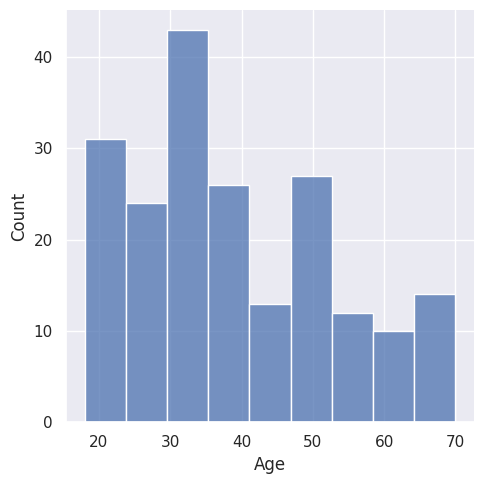

In [78]:
sns.displot(df["Age"])

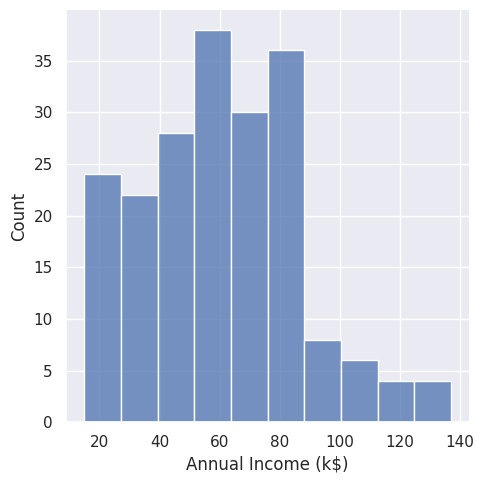

In [79]:
sns.displot(df["Annual Income (k$)"])

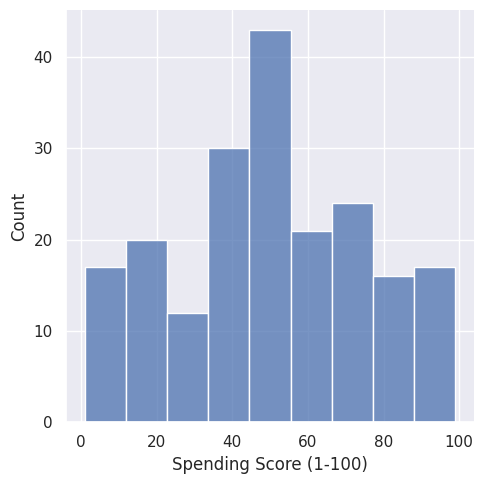

In [80]:
sns.displot(df["Spending Score (1-100)"])

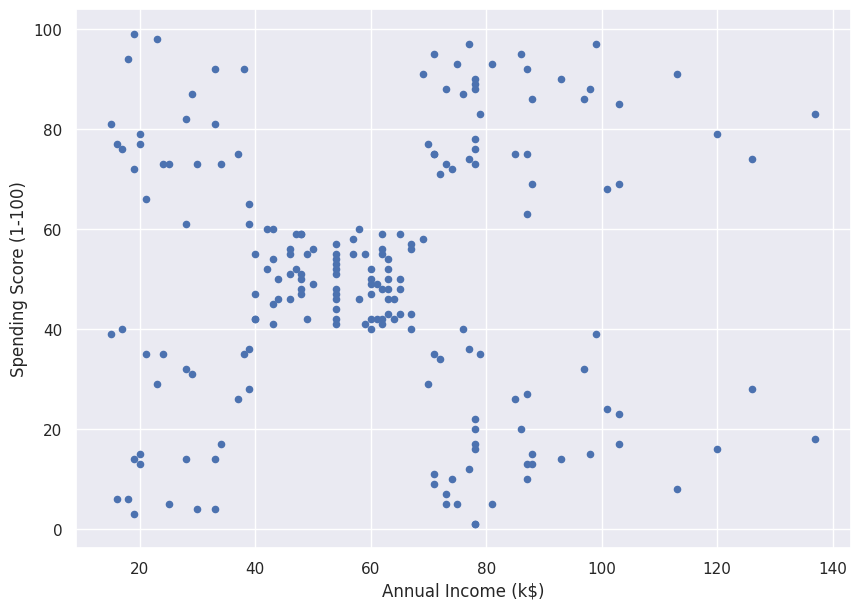

In [81]:
df.plot(kind = "scatter", x = "Annual Income (k$)", y = "Spending Score (1-100)", figsize=(10,7))
plt.show()

In [82]:
X = df.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Choosing Number of Clusters**

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

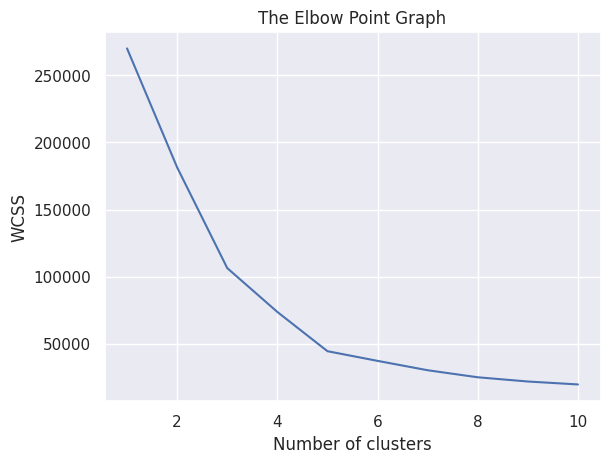

In [84]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Training the K-means Clustering model**

In [85]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = 0)
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [86]:
print("Centroids", kmeans.cluster_centers_)

Centroids [[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


In [87]:
centroids = kmeans.cluster_centers_

**2D Visualization of Clusters**

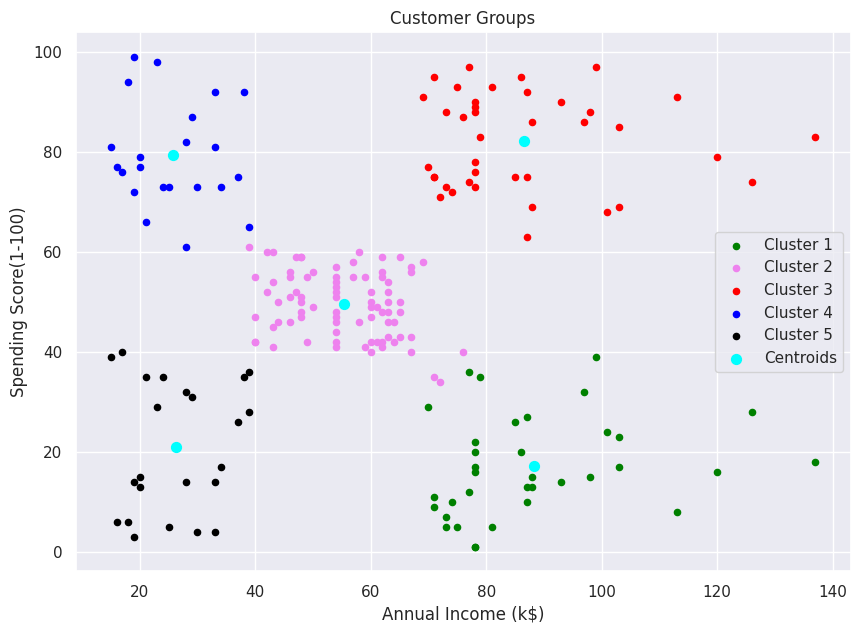

In [89]:
plt.figure(figsize =(10,7))
plt.scatter(X[Y==0,0], X[Y==0,1], s=20,color ='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=20,color ='violet', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=20,color ='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=20,color ='blue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=20,color ='black', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c='cyan', label ='Centroids')
plt.title("Customer Groups")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

**3D Visualization**

In [90]:
labels = kmeans.labels_

In [92]:
cluster_colors = ['green', 'violet', 'red', 'blue', 'black']

df['Cluster'] = labels

fig = go.Figure()

for cluster_label, color in zip(range(5), cluster_colors):
    cluster_data = df[df['Cluster'] == cluster_label]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Annual Income (k$)'],
        y=cluster_data['Spending Score (1-100)'],
        z=cluster_data['Age'],
        mode='markers',
        name=f'Cluster {cluster_label}',
        marker=dict(size=5, color=color)
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='Annual Income (k$)',
        yaxis_title='Spending Score (1-100)',
        zaxis_title='Age'
    ),
    title="K-means Clustering of Mall Customers"
)

pyo.iplot(fig)
